In [1]:
import pandas as pd
import numpy as np
import ftplib
import requests
import matplotlib.pyplot as plt
import os
import re
from datetime import datetime
import matplotlib as mpl 
mpl.rcParams["figure.dpi"] = 150
import seaborn as sns
import os

In [38]:
pip install reverse-geocoder

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
import reverse_geocoder as rg

In [36]:
meso_2010 = pd.read_csv('../weather_data/meso/meso-2010.csv', skiprows=2, parse_dates=['#ZTIME'])

In [39]:
# first add a new column containing both lat and lon
locations = list(zip(meso_2010['LAT'],meso_2010['LON']))
meso_2010['location'] = locations

# then get the county (admin2) into a new column
address = rg.search(locations)
meso_2010['county'] = [x['admin2'] for x in address]
meso_2010['state'] = [x['admin1'] for x in address]

In [40]:
meso_2010.head()

,#ZTIME,LON,LAT,WSR_ID,CELL_ID,CELL_TYPE,RANGE,AZIMUTH,BASE_HEIGHT,TOP_HEIGHT,HEIGHT,RADIUS,AZDIA,SHEAR,location,county,state
0,2010-01-01 00:00:25,-95.20293,32.06692,KSHV,M2,UNC SHR,73,252,7.7,7.7,7.7,1.8,4.1,5,"(32.06692, -95.20293)",Smith County,Texas
1,2010-01-01 00:00:50,-109.95558,45.20309,KBLX,NaN,UNC SHR,69,236,14.3,14.3,14.3,2.3,2.9,11,"(45.20309, -109.95558)",Stillwater County,Montana
2,2010-01-01 00:00:50,-110.10992,45.12659,KBLX,NaN,UNC SHR,77,236,16.6,16.6,16.6,13.4,3.2,10,"(45.12659, -110.10992)",Park County,Montana
3,2010-01-01 00:00:50,-109.65312,44.74401,KBLX,NaN,UNC SHR,80,214,17.3,17.3,17.3,10.4,2.6,9,"(44.74401, -109.65312)",Carbon County,Montana
4,2010-01-01 00:00:50,-110.00047,45.99929,KBLX,NaN,UNC SHR,59,279,18.3,18.3,18.3,1.2,3.7,6,"(45.99929, -110.00047)",Sweet Grass County,Montana


In [41]:
def string_split_first(s):
    parts = s.split(' ', 1)
    return parts[0]
def string_split_second(s):
    parts = s.split(' ', 1)
    return parts[1]

In [42]:
def date_to_string(d):
    return d.strftime('%Y-%m-%d %H:%M:%S')

In [20]:
meso_2010['DATE_STRING']=meso_2010['#ZTIME'].apply(date_to_string)

In [22]:
meso_2010['DATE']=meso_2010['DATE_STRING'].apply(string_split_first)

In [24]:
meso_2010['TIME']=meso_2010['DATE_STRING'].apply(string_split_second)

In [47]:
del meso_2010['WSR_ID']

In [48]:
del meso_2010['CELL_ID']

In [49]:
del meso_2010['CELL_TYPE']

In [50]:
del meso_2010['AZIMUTH']

In [ ]:
del meso_2010['DATE_STRING']

In [52]:
meso_2010.head()

,#ZTIME,LON,LAT,RANGE,BASE_HEIGHT,TOP_HEIGHT,HEIGHT,RADIUS,AZDIA,SHEAR,location,county,state
0,2010-01-01 00:00:25,-95.20293,32.06692,73,7.7,7.7,7.7,1.8,4.1,5,"(32.06692, -95.20293)",Smith County,Texas
1,2010-01-01 00:00:50,-109.95558,45.20309,69,14.3,14.3,14.3,2.3,2.9,11,"(45.20309, -109.95558)",Stillwater County,Montana
2,2010-01-01 00:00:50,-110.10992,45.12659,77,16.6,16.6,16.6,13.4,3.2,10,"(45.12659, -110.10992)",Park County,Montana
3,2010-01-01 00:00:50,-109.65312,44.74401,80,17.3,17.3,17.3,10.4,2.6,9,"(44.74401, -109.65312)",Carbon County,Montana
4,2010-01-01 00:00:50,-110.00047,45.99929,59,18.3,18.3,18.3,1.2,3.7,6,"(45.99929, -110.00047)",Sweet Grass County,Montana


In [53]:
meso_2010.to_csv('../weather_data/meso/meso-2010edited.csv', index=False)

In [54]:
cols= meso_2010.columns.tolist()

In [55]:
corr_matrix = meso_2010[cols[3:10]].corr()

<Axes: >

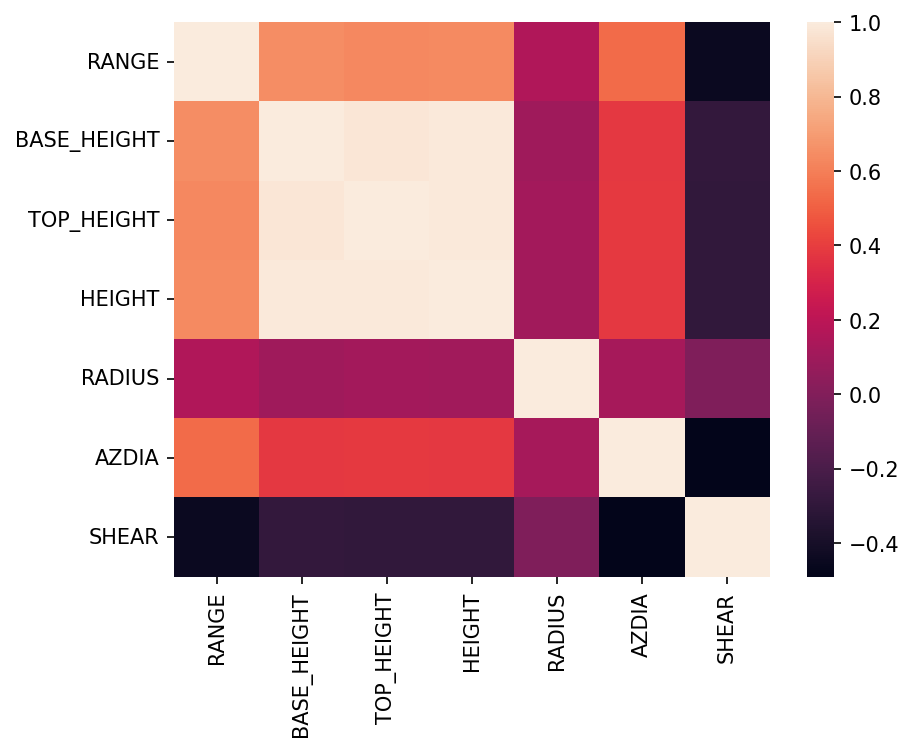

In [56]:
sns.heatmap(corr_matrix)